# GRIP @ The Sparks Foundation

# Induri Deepthi

## Data Science and Business Analytics Intern

## Task 2 - Prediction using Unsupervised ML

From the given ‘Iris’ dataset, predicting the optimum number of clusters and representing it visually.

### Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
# Load the iris dataset

iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
print(iris_df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


In [3]:
iris_df.head() # See the first 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Determining the Optimum Number of Clusters Using Elbow Method

In [4]:
# Finding the optimum number of clusters for k-means classification

x = iris_df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',  max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

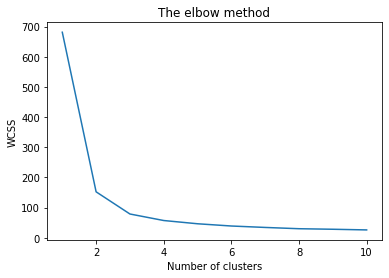

In [5]:
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'

plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this we choose the number of clusters as ** '3**'.

### Creating Kmeans Classifier

In [6]:
# Applying kmeans to the dataset / Creating the kmeans classifier

kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

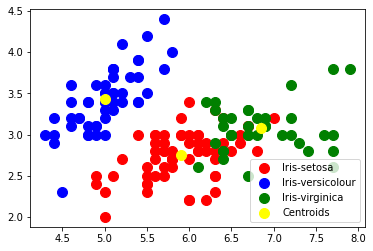

In [7]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')


# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

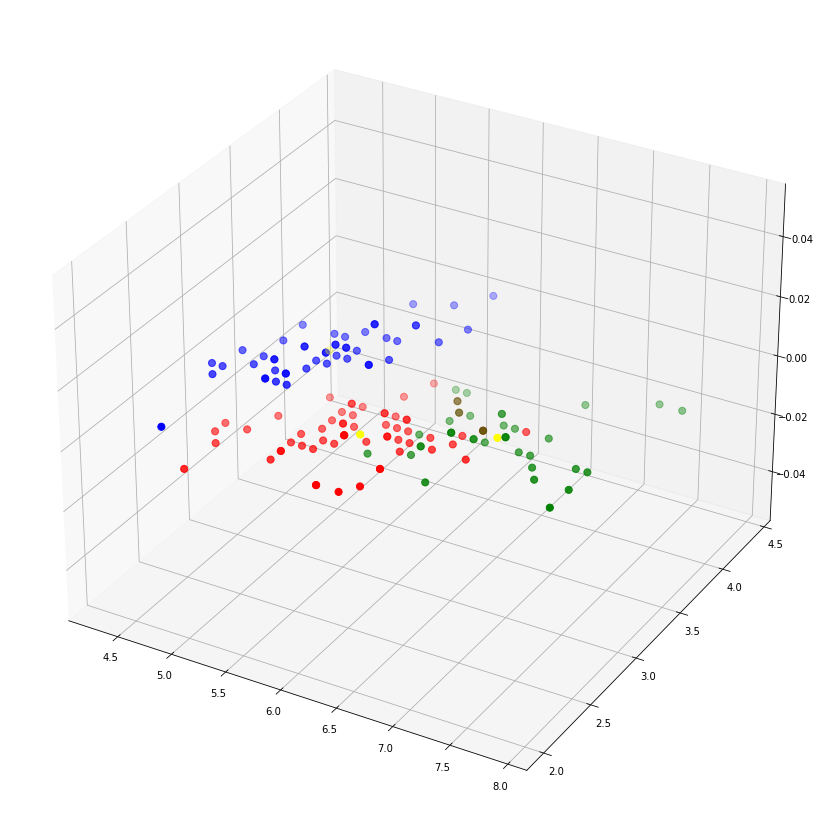

In [8]:
# 3d scatterplot using matplotlib

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 50, c = 'yellow', label = 'Centroids')
plt.show()

### Labeling the predictions

In [9]:
#considering 0 Corresponds to 'Iris-setosa'
#1 to 'Iris-versicolour'
#2 to 'Iris-virginica'

y_kmeans = np.where(y_kmeans==0, 'Iris-setosa', y_kmeans)
y_kmeans = np.where(y_kmeans=='1', 'Iris-versicolour', y_kmeans)
y_kmeans = np.where(y_kmeans=='2', 'Iris-virginica', y_kmeans)

### Adding the prediction to the dataset

In [10]:
data_with_clusters = iris_df.copy()
data_with_clusters["Cluster"] = y_kmeans
print(data_with_clusters.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

            Cluster  
0  Iris-versicolour  
1  Iris-versicolour  
2  Iris-versicolour  
3  Iris-versicolour  
4  Iris-versicolour  


### Data Visualization

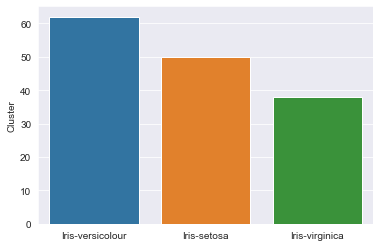

In [11]:
# Bar graph
sns.set_style('darkgrid')
sns.barplot(x = data_with_clusters["Cluster"] .unique(), y = data_with_clusters["Cluster"] .value_counts());

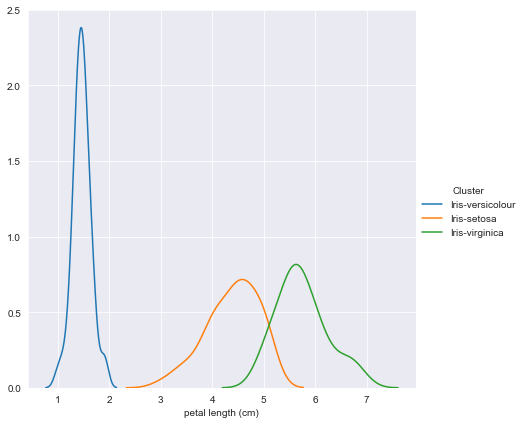

In [12]:
# A final seaborn plot useful for looking at univariate relations is the kdeplot, 
# which creates and visualizes a kernel density estimate of the underlying feature

sns.FacetGrid(data_with_clusters, hue = "Cluster", size = 6) \
   .map(sns.kdeplot, "petal length (cm)") \
   .add_legend()

### Box Plot

<AxesSubplot:xlabel='Cluster', ylabel='petal length (cm)'>

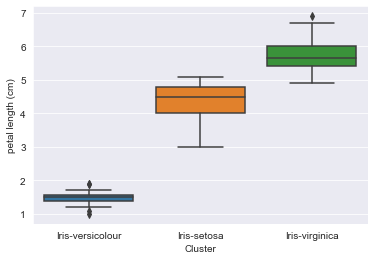

In [14]:
# We can look at an individual feature in Seaborn through a boxplot

sns.boxplot(x = "Cluster", y = "petal length (cm)", data = data_with_clusters)

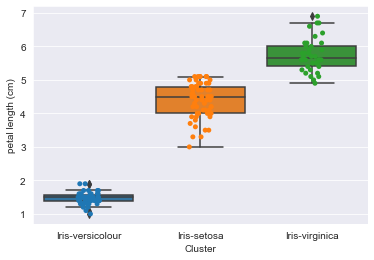

In [15]:
# One way we can extend this plot is adding a layer of individual points on top of it through Seaborn's striplot
# We'll use jitter=True so that all the points don't fall in single vertical lines above the species
# Saving the resulting axes as ax each time causes the resulting plot to be shown on top of the previous axes

ax = sns.boxplot(x = "Cluster", y = "petal length (cm)", data = data_with_clusters)
ax = sns.stripplot(x = "Cluster", y = "petal length (cm)", data = data_with_clusters, jitter = True, edgecolor = "gray")

### Violin Plot

<AxesSubplot:xlabel='Cluster', ylabel='petal length (cm)'>

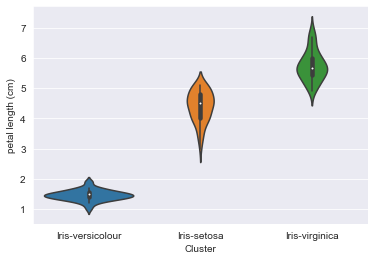

In [16]:
# A violin plot combines the benefits of the previous two plots and simplifies them
# Denser regions of the data are fatter, and sparser thiner in a violin plot

sns.violinplot(x = "Cluster", y = "petal length (cm)", data = data_with_clusters, size = 6)

### Using the dendrogram to find the optimal number of clusters

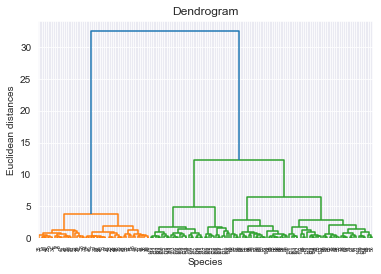

In [17]:
#Hierarchical Clustering

import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Species')
plt.ylabel('Euclidean distances')
plt.show()

array([[<AxesSubplot:title={'center':'petal length (cm)'}, xlabel='[Cluster]'>,
        <AxesSubplot:title={'center':'petal width (cm)'}, xlabel='[Cluster]'>],
       [<AxesSubplot:title={'center':'sepal length (cm)'}, xlabel='[Cluster]'>,
        <AxesSubplot:title={'center':'sepal width (cm)'}, xlabel='[Cluster]'>]],
      dtype=object)

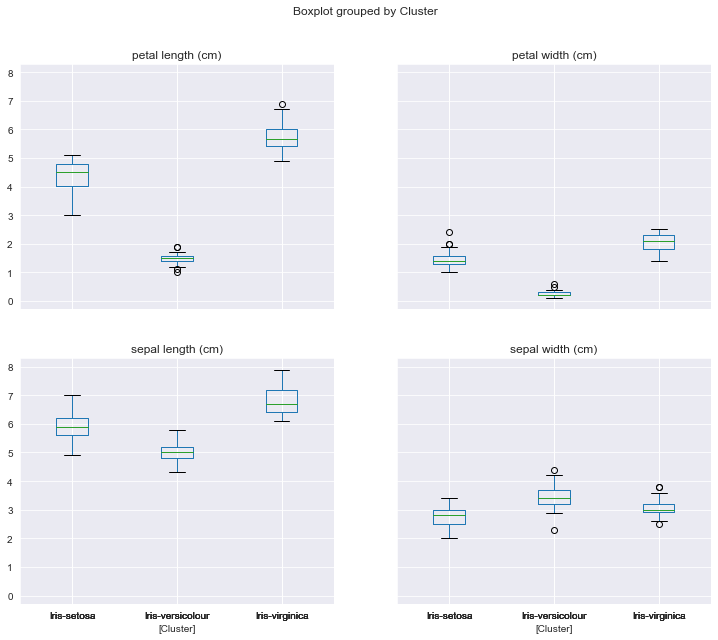

In [18]:
# We can quickly make a boxplot with Pandas on each feature split out by species

data_with_clusters.boxplot(by = "Cluster", figsize = (12, 10))

### Pair plot

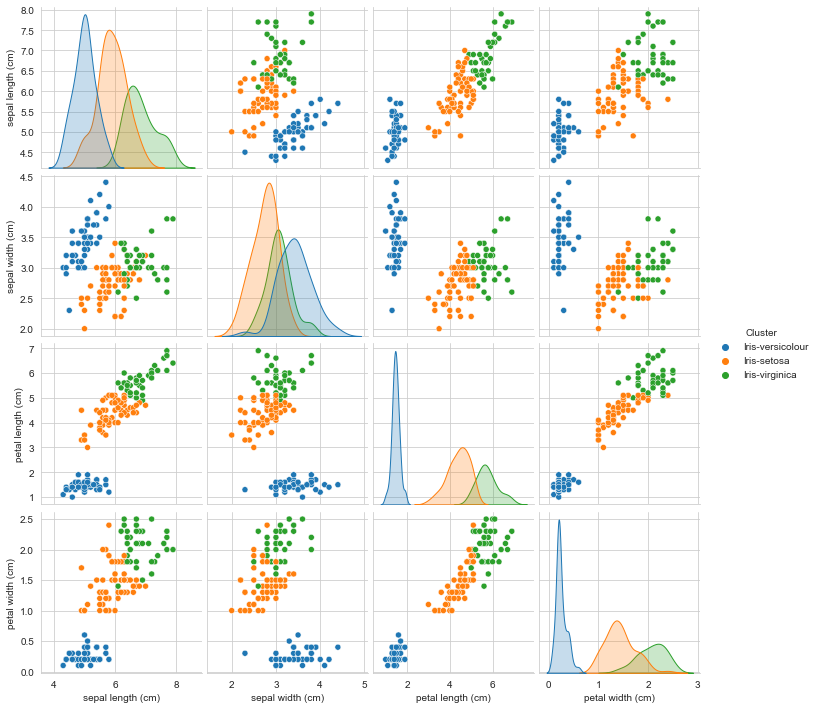

In [19]:
### hue = species colours plot as per species
### It will give 3 colours in the plot

sns.set_style('whitegrid')   ### Sets grid style
sns.pairplot(data_with_clusters,hue = "Cluster");

### Andrews Curves

<AxesSubplot:>

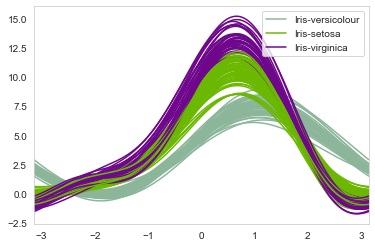

In [20]:
# Andrews Curves involve using attributes of samples as coefficients for Fourier series and then plotting these

pd.plotting.andrews_curves(data_with_clusters, "Cluster")

### Parallel Coordinates

<AxesSubplot:>

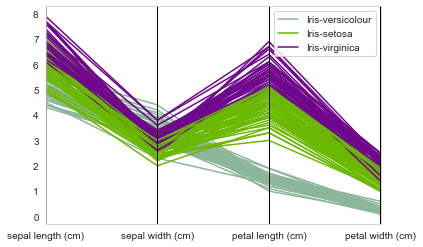

In [21]:
# Parallel coordinates plots each feature on a separate column & then draws lines connecting the features for each data sample

pd.plotting.parallel_coordinates(data_with_clusters, "Cluster")

### Radviz

<AxesSubplot:>

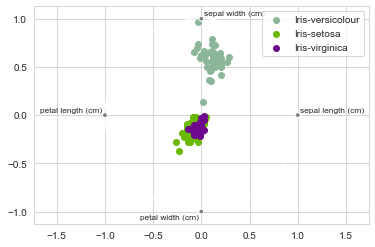

In [22]:
# A final multivariate visualization technique pandas has is radviz
# Which puts each feature as a point on a 2D plane, and then simulates having each sample attached to those points through
# a spring weighted by the relative value for that feature

pd.plotting.radviz(data_with_clusters, "Cluster")